In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_ds="/Users/jayasakthibalajig/ClgWorks/Final/Dataset/train"
test_ds="/Users/jayasakthibalajig/ClgWorks/Final/Dataset/test"

In [3]:
import os

root_path = r"/Users/jayasakthibalajig/ClgWorks/Final/Dataset/train"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

class_dis = []
for name in class_names:
    class_path = os.path.join(root_path, name)
    if os.path.isdir(class_path):
        class_dis.append(len(os.listdir(class_path)))
    else:
        print(f"Warning: Directory '{class_path}' does not exist.")

print(f"Total Number of Classes: {n_classes}")
print(f"Class Names: {class_names}")
for name, count in zip(class_names, class_dis):
    print(f"{name}: {count}")


Total Number of Classes: 4
Class Names: ['accident', 'dense_traffic', 'fire', 'sparse_traffic']
accident: 900
dense_traffic: 900
fire: 900
sparse_traffic: 901


In [4]:
import plotly.express as px

In [5]:
os.listdir("/Users/jayasakthibalajig/ClgWorks/Final/Dataset/train")

['accident', 'sparse_traffic', 'fire', 'dense_traffic']

In [6]:
os.listdir("/Users/jayasakthibalajig/ClgWorks/Final/Dataset/test")

['accident', 'sparse_traffic', 'fire', 'dense_traffic']

In [7]:
batch_size=32
img_size=224

In [8]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [9]:
test_generator[0][0].shape

(32, 224, 224, 3)

In [10]:
img= train_generator[0]
print(img)

(array([[[[0.35541853, 0.33377856, 0.38925993],
         [0.35541853, 0.33377856, 0.38925993],
         [0.35541853, 0.33377856, 0.38925993],
         ...,
         [0.18346862, 0.2111572 , 0.13248824],
         [0.14136931, 0.17274186, 0.09038892],
         [0.17930707, 0.21431987, 0.12901491]],

        [[0.42732102, 0.41812733, 0.45355147],
         [0.42732102, 0.41812733, 0.45355147],
         [0.42732102, 0.41812733, 0.45355147],
         ...,
         [0.18304828, 0.21093813, 0.13166533],
         [0.19022474, 0.22159728, 0.13800812],
         [0.26230377, 0.2989888 , 0.2081141 ]],

        [[0.4543794 , 0.45568582, 0.46117744],
         [0.4543794 , 0.45568582, 0.46117744],
         [0.4543794 , 0.45568582, 0.46117744],
         ...,
         [0.32571658, 0.35432616, 0.27249438],
         [0.34618938, 0.37756196, 0.28940654],
         [0.32452726, 0.3612123 , 0.268183  ]],

        ...,

        [[0.882353  , 0.87843144, 0.8588236 ],
         [0.882353  , 0.87843144, 0.8588236 

In [11]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [12]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 4)


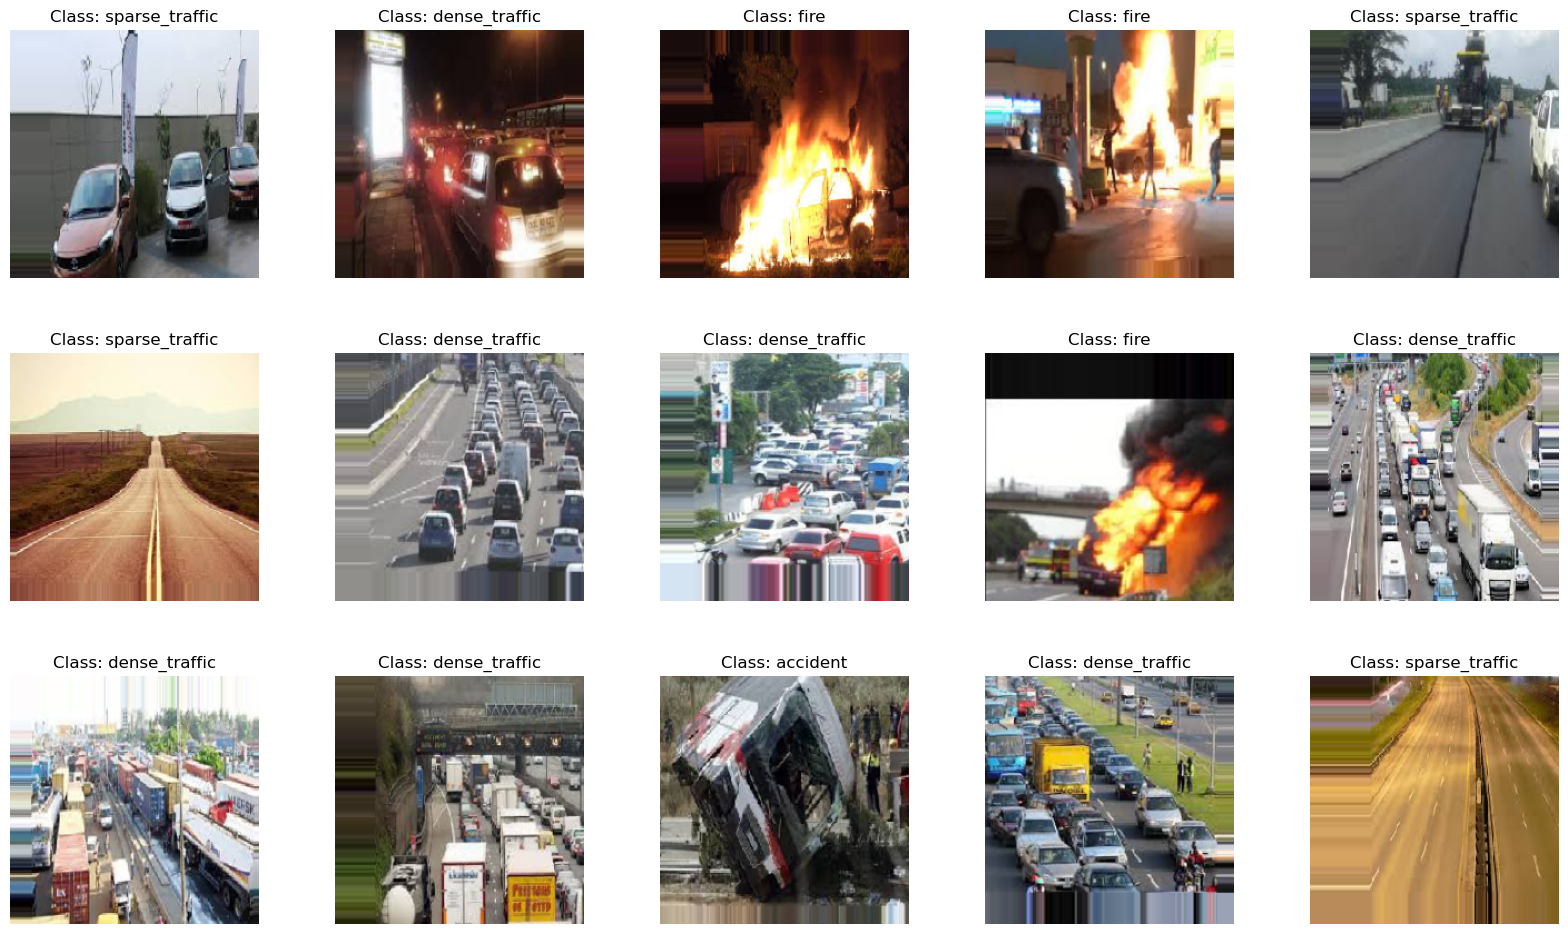

In [13]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [14]:
print(len(train_generator))
print(len(test_ds))

113
52


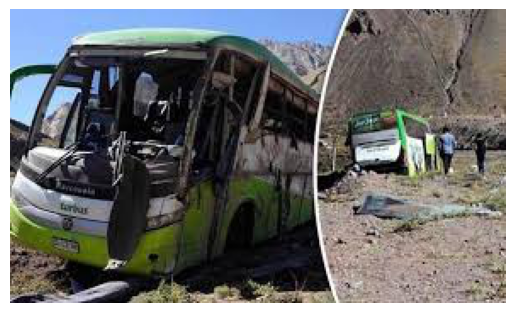

In [15]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/Users/jayasakthibalajig/ClgWorks/Final/Dataset/train/accident/images_212.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
from keras.layers import MaxPool2D

In [17]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

In [19]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(4, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes =4

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

/var/folders/6g/4xs5vtms423996692rqhqww80000gn/T/ipykernel_20514/1915805711.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [20]:
model = mobilenet((224, 224, 3))

/var/folders/6g/4xs5vtms423996692rqhqww80000gn/T/ipykernel_20514/1915805711.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


In [21]:
# Print the model summary

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [24]:
history =model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20


/Users/jayasakthibalajig/Sakthi/Anaconda/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.6663 - loss: 0.9774 - val_accuracy: 0.7613 - val_loss: 0.8516
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.9094 - loss: 0.2668 - val_accuracy: 0.9137 - val_loss: 0.2499
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 518s 5s/step - accuracy: 0.9441 - loss: 0.1554 - val_accuracy: 0.9125 - val_loss: 0.2940
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.9481 - loss: 0.1474 - val_accuracy: 0.9388 - val_loss: 0.1879
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.9607 - loss: 0.1126 - val_accuracy: 0.9300 - val_loss: 0.2053
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.9686 - loss: 0.1037 - val_accuracy: 0.9400 - val_loss: 0.1659
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 493s 4s/step - accuracy: 0.9619 - loss: 0.0887 - val_accuracy: 0.9388 - val_loss: 0.1994
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.9791 - loss: 0.0577 - val_accuracy: 0.940

In [25]:
n_categories = len(os.listdir("/Users/jayasakthibalajig/ClgWorks/Final/Dataset/test"))# number of categories print(n_categories)

In [26]:
n_categories

4

In [27]:
results =pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
15,0.987500,0.035445,0.92000,0.270484
16,0.993056,0.021649,0.95000,0.199425
17,0.991111,0.029175,0.94250,0.220071
18,0.994722,0.016786,0.94375,0.220432
19,0.992500,0.023373,0.93250,0.257193


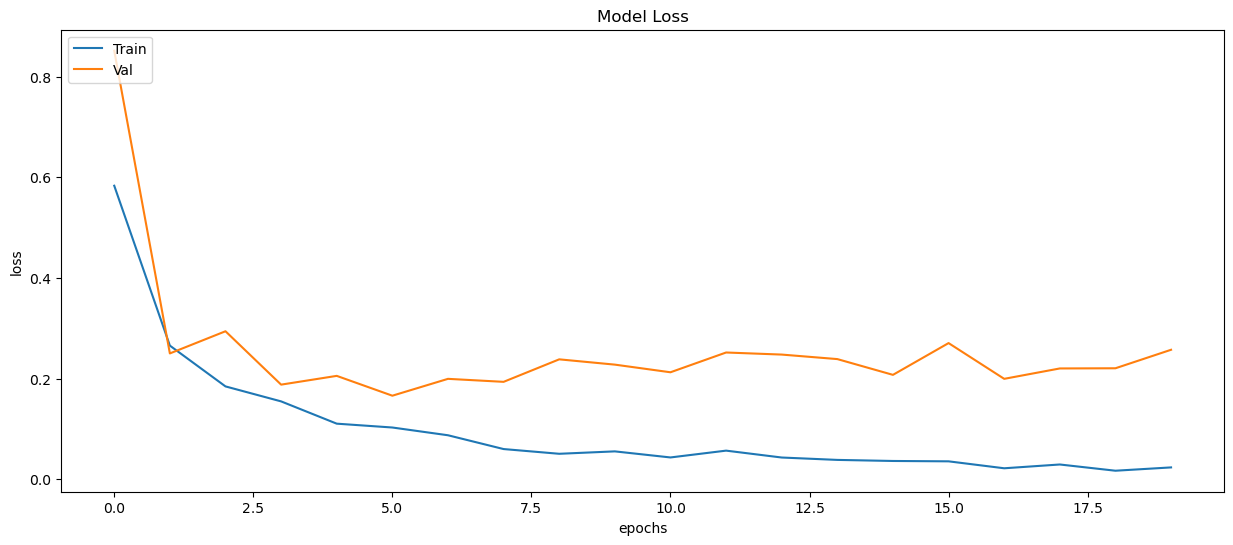

In [28]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

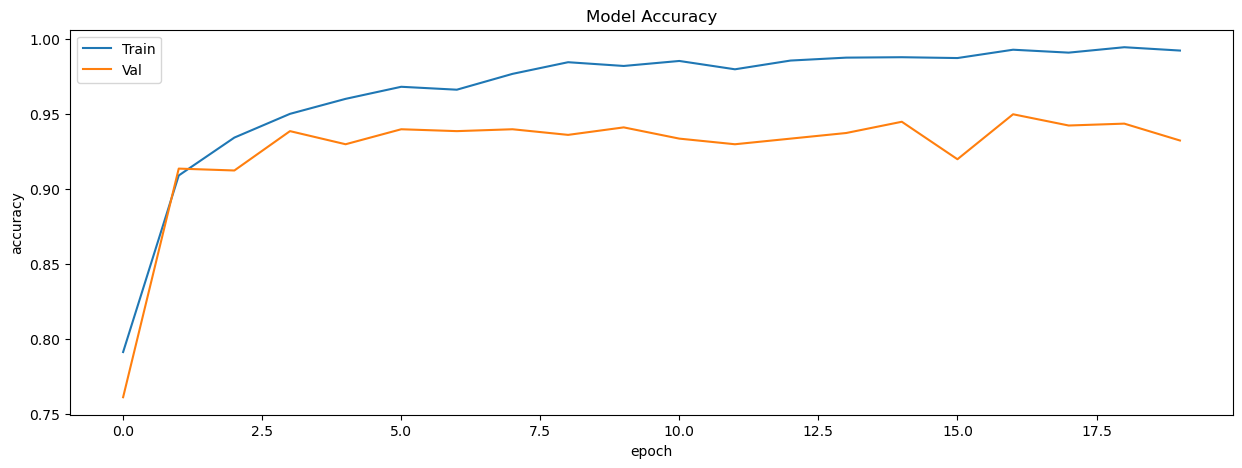

In [29]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [30]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step


In [31]:
results =model.evaluate(test_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.9440 - loss: 0.2300


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       200
           1       0.97      0.90      0.94       200
           2       0.97      0.97      0.97       200
           3       0.94      0.90      0.92       200

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



In [33]:
model_json = model.to_json()
with open("/Users/jayasakthibalajig/ClgWorks/Final/model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [37]:
model.save_weights("/Users/jayasakthibalajig/ClgWorks/Final/model_weights.weights.h5")

In [40]:
model.save("/Users/jayasakthibalajig/ClgWorks/Final/model.h5")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step


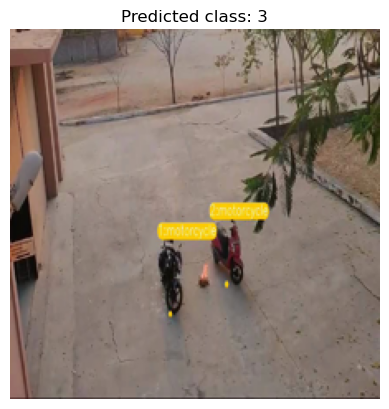

In [45]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = "/Users/jayasakthibalajig/ClgWorks/Final/YOLOv7AndDeepSORT/runs/Pics"
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [46]:
count_fire=0
count_dense=0
count_sparse=0
count_accident=0

for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    if(labels[predicted_class]=="fire"):
        count_fire+=1
    elif labels[predicted_class] == "dense_traffic":
        count_dense+=1
    elif labels[predicted_class] == "accident":
        count_accident+=1
    elif labels[predicted_class] == "sparse_traffic":
        count_sparse+=1
    print('Class probability:', class_probability)

Predicted class for 1.jpg : sparse_traffic
Class probability: 0.99998844
Predicted class for 2.jpg : sparse_traffic
Class probability: 0.99998903
Predicted class for 3.jpg : sparse_traffic
Class probability: 0.9999933
Predicted class for 4.jpg : sparse_traffic
Class probability: 0.9999962
Predicted class for 5.jpg : sparse_traffic
Class probability: 0.9999975
Predicted class for 6.jpg : sparse_traffic
Class probability: 0.99999547
Predicted class for 7.jpg : sparse_traffic
Class probability: 0.999997
Predicted class for 8.jpg : sparse_traffic
Class probability: 0.9999927
Predicted class for 9.jpg : sparse_traffic
Class probability: 0.9999851
Predicted class for 10.jpg : sparse_traffic
Class probability: 0.999997
Predicted class for 11.jpg : sparse_traffic
Class probability: 0.9999881
Predicted class for 12.jpg : sparse_traffic
Class probability: 0.99997264
Predicted class for 13.jpg : sparse_traffic
Class probability: 0.99999
Predicted class for 14.jpg : sparse_traffic
Class probabilit

In [47]:
print("Fire : ",count_fire)
print("Dense : ",count_dense)
print("Accident : ",count_accident)
print("Sparse : ",count_sparse)

Fire :  0
Dense :  0
Accident :  0
Sparse :  665


In [48]:
import smtplib
from email.mime.text import MIMEText


if count_fire>count_dense and count_fire>count_accident and count_fire>count_sparse:
    sender_email = 'gjsbsakthi@gmail.com'
    sender_password = 'hdyc qqas icwq soge'
    recipient_email = 'ni3kfury@gmail.com'
    subject = 'Alert'
    body = 'Fire'
    
    message = MIMEText(body)
    message['Subject'] = subject
    message['From'] = sender_email
    message['To'] = recipient_email
    
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, recipient_email, message.as_string())



elif count_dense>count_fire and count_dense>count_accident and count_dense>count_sparse:
    sender_email = 'gjsbsakthi@gmail.com'
    sender_password = 'hdyc qqas icwq soge'
    recipient_email = 'ni3kfury@gmail.com'
    subject = 'Alert'
    body = 'Dense Traffic'
    
    message = MIMEText(body)
    message['Subject'] = subject
    message['From'] = sender_email
    message['To'] = recipient_email
    
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, recipient_email, message.as_string())




elif count_accident>count_fire and count_accident>count_dense and count_accident>count_sparse:
    sender_email = 'gjsbsakthi@gmail.com'
    sender_password = 'hdyc qqas icwq soge'
    recipient_email = 'ni3kfury@gmail.com'
    subject = 'Alert'
    body = 'Accident'
    
    message = MIMEText(body)
    message['Subject'] = subject
    message['From'] = sender_email
    message['To'] = recipient_email
    
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, recipient_email, message.as_string())




elif count_sparse>count_fire and count_sparse>count_accident and count_sparse>count_dense:
    sender_email = 'gjsbsakthi@gmail.com'
    sender_password = 'hdyc qqas icwq soge'
    recipient_email = 'ni3kfury@gmail.com'
    subject = 'Alert'
    body = 'Sparse Traffic'
    
    message = MIMEText(body)
    message['Subject'] = subject
    message['From'] = sender_email
    message['To'] = recipient_email
    
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, recipient_email, message.as_string())